In [1]:
#import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

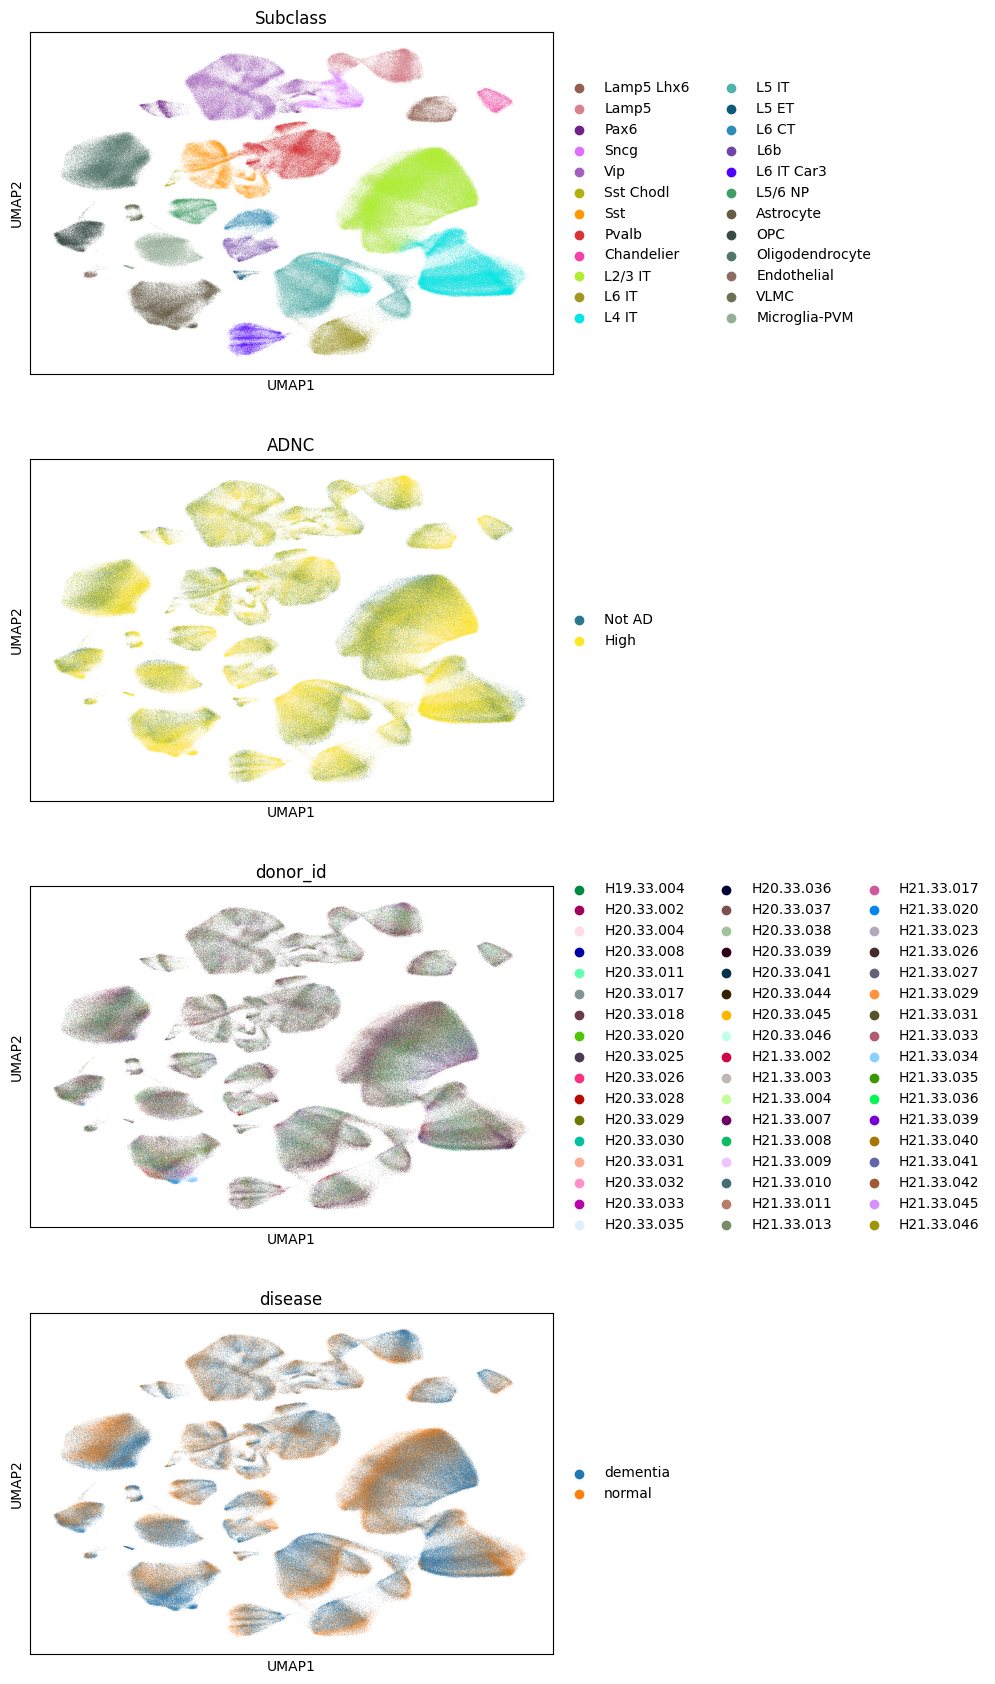

In [2]:
adata=sc.read_h5ad("./data/AD.h5ad")
adata.raw = None
adata=adata[adata.obs["ADNC"].isin(['Not AD','High'])]
sc.pl.umap(adata,color=["Subclass","ADNC","donor_id","disease"],ncols=1)

In [3]:
from ndreamer import NDreamer

model = NDreamer(adata, condition_key="ADNC", contorl_name='Not AD', num_hvg=2000, require_batch=True,
                            batch_key='donor_id',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=8192, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./AD_ADNC/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./AD_ADNC/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()

model.get_modifier_space()
model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

Using device: <class 'torch.cuda.device'>
1
Start data preprocessing


Original adata.obs[donor_id] back up to adata.obs['batch_backup']
Original adata.obs[ADNC] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'Not AD': 0, 'High': 1}
Condition mapping to adata.obs['batch']: {'donor_id': {'H21.33.035': 0, 'H20.33.033': 1, 'H20.33.031': 2, 'H21.33.036': 3, 'H21.33.002': 4, 'H20.33.025': 5, 'H21.33.040': 6, 'H21.33.026': 7, 'H21.33.008': 8, 'H20.33.046': 9, 'H20.33.002': 10, 'H20.33.026': 11, 'H19.33.004': 12, 'H21.33.013': 13, 'H20.33.020': 14, 'H20.33.041': 15, 'H20.33.018': 16, 'H21.33.004': 17, 'H21.33.011': 18, 'H20.33.044': 19, 'H21.33.041': 20, 'H20.33.028': 21, 'H21.33.010': 22, 'H21.33.046': 23, 'H21.33.029': 24, 'H20.33.017': 25, 'H21.33.007': 26, 'H20.33.004': 27, 'H20.33.039': 28, 'H20.33.011': 29, 'H20.33.036': 30, 'H21.33.042': 31, 'H20.33.030': 32, 'H21.33.023': 33, 'H20.33.029': 34, 'H20.33.032': 35, 'H21.33.039': 36, 'H20.33.035': 37, 'H20.33.037': 38, 'H20.33.045': 39, 'H21.33.031': 40, 'H21.33.027': 4

Calculating the clusters


Unique groups: ['0_High' '10_Not AD' '11_High' '12_Not AD' '13_High' '14_High' '15_High'
 '16_High' '17_Not AD' '18_Not AD' '19_Not AD' '1_High' '20_Not AD'
 '21_High' '22_High' '23_High' '24_High' '25_High' '26_High' '27_High'
 '28_High' '29_High' '2_High' '30_High' '31_High' '32_High' '33_Not AD'
 '34_High' '35_High' '36_High' '37_Not AD' '38_High' '39_High' '3_High'
 '40_High' '41_High' '42_Not AD' '43_High' '44_High' '45_High' '46_High'
 '47_High' '48_High' '49_High' '4_High' '50_High' '5_High' '6_High'
 '7_High' '8_High' '9_High']


Finished clustering
Data preprocessing done


Remaining number of cells: 701490


Too few epoches (steps, if rigorously speaking). Changing epoch to 26 to adjust for number of cells
Require batch: True
Batch name to number mapping (may be used for search for saved adata):
 {'donor_id': {'H21.33.035': 0, 'H20.33.033': 1, 'H20.33.031': 2, 'H21.33.036': 3, 'H21.33.002': 4, 'H20.33.025': 5, 'H21.33.040': 6, 'H21.33.026': 7, 'H21.33.008': 8, 'H20.33.046': 9, 'H20.33.002': 10, 'H20.33.026': 11, 'H19.33.004': 12, 'H21.33.013': 13, 'H20.33.020': 14, 'H20.33.041': 15, 'H20.33.018': 16, 'H21.33.004': 17, 'H21.33.011': 18, 'H20.33.044': 19, 'H21.33.041': 20, 'H20.33.028': 21, 'H21.33.010': 22, 'H21.33.046': 23, 'H21.33.029': 24, 'H20.33.017': 25, 'H21.33.007': 26, 'H20.33.004': 27, 'H20.33.039': 28, 'H20.33.011': 29, 'H20.33.036': 30, 'H21.33.042': 31, 'H20.33.030': 32, 'H21.33.023': 33, 'H20.33.029': 34, 'H20.33.032': 35, 'H21.33.039': 36, 'H20.33.035': 37, 'H20.33.037': 38, 'H20.33.045': 39, 'H21.33.031': 40, 'H21.33.027': 41, 'H21.33.003': 42, 'H20.33.008': 43, 'H21.33.017'

Overall Progress:   0%|          | 0/26 [00:00<?, ?it/s]

Resetting 792 unused embeddings.


Resetting 793 unused embeddings.


Resetting 785 unused embeddings.


Resetting 797 unused embeddings.


Resetting 764 unused embeddings.


Resetting 808 unused embeddings.


Resetting 775 unused embeddings.


Resetting 773 unused embeddings.


Resetting 794 unused embeddings.


Resetting 757 unused embeddings.


Resetting 788 unused embeddings.


Resetting 795 unused embeddings.


Resetting 778 unused embeddings.


Resetting 788 unused embeddings.


Resetting 781 unused embeddings.


Resetting 811 unused embeddings.


Resetting 805 unused embeddings.


Resetting 817 unused embeddings.


Resetting 773 unused embeddings.


Resetting 796 unused embeddings.


Resetting 792 unused embeddings.


Resetting 817 unused embeddings.


Resetting 788 unused embeddings.


Resetting 787 unused embeddings.


Resetting 764 unused embeddings.


Resetting 785 unused embeddings.


Resetting 809 unused embeddings.


Resetting 820 unused embeddings.


Resetting 806 unused embeddings.


Resetting 781 unused embeddings.


Resetting 815 unused embeddings.


Resetting 803 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 0


Epoch: 1/26 | All Loss: 70.1437 | Neighborhood Loss: 47.5887 | Triplet Loss: 3.7081 | Reconstruction Loss: 7.3481 | Independent Loss: 23.3162 | KL Loss: 0.3223 | Commitment Loss: 0.4134 | Dependent Loss: -12.5532


Resetting 830 unused embeddings.


Resetting 823 unused embeddings.


Resetting 752 unused embeddings.


Resetting 793 unused embeddings.


Resetting 777 unused embeddings.


Resetting 802 unused embeddings.


Resetting 801 unused embeddings.


Resetting 826 unused embeddings.


Resetting 675 unused embeddings.


Resetting 816 unused embeddings.


Resetting 821 unused embeddings.


Resetting 810 unused embeddings.


Resetting 735 unused embeddings.


Resetting 767 unused embeddings.


Resetting 758 unused embeddings.


Resetting 834 unused embeddings.


Resetting 831 unused embeddings.


Resetting 819 unused embeddings.


Resetting 691 unused embeddings.


Resetting 770 unused embeddings.


Resetting 829 unused embeddings.


Resetting 840 unused embeddings.


Resetting 826 unused embeddings.


Resetting 756 unused embeddings.


Resetting 774 unused embeddings.


Resetting 722 unused embeddings.


Resetting 802 unused embeddings.


Resetting 807 unused embeddings.


Resetting 842 unused embeddings.


Resetting 741 unused embeddings.


Resetting 795 unused embeddings.


Resetting 809 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 1


Resetting 793 unused embeddings.


Resetting 751 unused embeddings.


Resetting 722 unused embeddings.


Resetting 756 unused embeddings.


Resetting 741 unused embeddings.


Resetting 782 unused embeddings.


Resetting 766 unused embeddings.


Resetting 791 unused embeddings.


Resetting 679 unused embeddings.


Resetting 780 unused embeddings.


Resetting 793 unused embeddings.


Resetting 779 unused embeddings.


Resetting 723 unused embeddings.


Resetting 761 unused embeddings.


Resetting 748 unused embeddings.


Resetting 760 unused embeddings.


Resetting 804 unused embeddings.


Resetting 783 unused embeddings.


Resetting 659 unused embeddings.


Resetting 742 unused embeddings.


Resetting 784 unused embeddings.


Resetting 823 unused embeddings.


Resetting 797 unused embeddings.


Resetting 738 unused embeddings.


Resetting 717 unused embeddings.


Resetting 712 unused embeddings.


Resetting 722 unused embeddings.


Resetting 788 unused embeddings.


Resetting 795 unused embeddings.


Resetting 680 unused embeddings.


Resetting 754 unused embeddings.


Resetting 779 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 1


Epoch: 2/26 | All Loss: 46.1577 | Neighborhood Loss: 38.0344 | Triplet Loss: 0.9867 | Reconstruction Loss: 5.1221 | Independent Loss: 14.2691 | KL Loss: 0.1581 | Commitment Loss: 0.2481 | Dependent Loss: -12.6607


Resetting 775 unused embeddings.


Resetting 747 unused embeddings.


Resetting 723 unused embeddings.


Resetting 757 unused embeddings.


Resetting 741 unused embeddings.


Resetting 749 unused embeddings.


Resetting 743 unused embeddings.


Resetting 770 unused embeddings.


Resetting 678 unused embeddings.


Resetting 751 unused embeddings.


Resetting 759 unused embeddings.


Resetting 759 unused embeddings.


Resetting 721 unused embeddings.


Resetting 749 unused embeddings.


Resetting 730 unused embeddings.


Resetting 746 unused embeddings.


Resetting 783 unused embeddings.


Resetting 767 unused embeddings.


Resetting 649 unused embeddings.


Resetting 720 unused embeddings.


Resetting 763 unused embeddings.


Resetting 819 unused embeddings.


Resetting 774 unused embeddings.


Resetting 731 unused embeddings.


Resetting 721 unused embeddings.


Resetting 715 unused embeddings.


Resetting 706 unused embeddings.


Resetting 729 unused embeddings.


Resetting 770 unused embeddings.


Resetting 682 unused embeddings.


Resetting 732 unused embeddings.


Resetting 760 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 2


Resetting 767 unused embeddings.


Resetting 736 unused embeddings.


Resetting 729 unused embeddings.


Resetting 749 unused embeddings.


Resetting 721 unused embeddings.


Resetting 751 unused embeddings.


Resetting 745 unused embeddings.


Resetting 768 unused embeddings.


Resetting 681 unused embeddings.


Resetting 732 unused embeddings.


Resetting 756 unused embeddings.


Resetting 731 unused embeddings.


Resetting 728 unused embeddings.


Resetting 730 unused embeddings.


Resetting 720 unused embeddings.


Resetting 726 unused embeddings.


Resetting 747 unused embeddings.


Resetting 756 unused embeddings.


Resetting 645 unused embeddings.


Resetting 714 unused embeddings.


Resetting 758 unused embeddings.


Resetting 822 unused embeddings.


Resetting 747 unused embeddings.


Resetting 740 unused embeddings.


Resetting 692 unused embeddings.


Resetting 707 unused embeddings.


Resetting 705 unused embeddings.


Resetting 726 unused embeddings.


Resetting 761 unused embeddings.


Resetting 684 unused embeddings.


Resetting 723 unused embeddings.


Resetting 747 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 2


Epoch: 3/26 | All Loss: 38.0476 | Neighborhood Loss: 32.5286 | Triplet Loss: 0.6187 | Reconstruction Loss: 4.6783 | Independent Loss: 13.3163 | KL Loss: 0.1531 | Commitment Loss: 0.2340 | Dependent Loss: -13.4813


Resetting 741 unused embeddings.


Resetting 720 unused embeddings.


Resetting 723 unused embeddings.


Resetting 741 unused embeddings.


Resetting 722 unused embeddings.


Resetting 754 unused embeddings.


Resetting 737 unused embeddings.


Resetting 756 unused embeddings.


Resetting 677 unused embeddings.


Resetting 715 unused embeddings.


Resetting 746 unused embeddings.


Resetting 715 unused embeddings.


Resetting 730 unused embeddings.


Resetting 729 unused embeddings.


Resetting 704 unused embeddings.


Resetting 729 unused embeddings.


Resetting 748 unused embeddings.


Resetting 761 unused embeddings.


Resetting 645 unused embeddings.


Resetting 715 unused embeddings.


Resetting 756 unused embeddings.


Resetting 806 unused embeddings.


Resetting 727 unused embeddings.


Resetting 729 unused embeddings.


Resetting 684 unused embeddings.


Resetting 704 unused embeddings.


Resetting 699 unused embeddings.


Resetting 716 unused embeddings.


Resetting 753 unused embeddings.


Resetting 677 unused embeddings.


Resetting 715 unused embeddings.


Resetting 745 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 3


Epoch: 4/26 | All Loss: 36.0408 | Neighborhood Loss: 30.8330 | Triplet Loss: 0.5621 | Reconstruction Loss: 4.5670 | Independent Loss: 14.9263 | KL Loss: 0.1590 | Commitment Loss: 0.2492 | Dependent Loss: -15.2556


Resetting 730 unused embeddings.


Resetting 708 unused embeddings.


Resetting 716 unused embeddings.


Resetting 740 unused embeddings.


Resetting 710 unused embeddings.


Resetting 756 unused embeddings.


Resetting 738 unused embeddings.


Resetting 751 unused embeddings.


Resetting 677 unused embeddings.


Resetting 715 unused embeddings.


Resetting 752 unused embeddings.


Resetting 711 unused embeddings.


Resetting 737 unused embeddings.


Resetting 739 unused embeddings.


Resetting 695 unused embeddings.


Resetting 717 unused embeddings.


Resetting 751 unused embeddings.


Resetting 752 unused embeddings.


Resetting 648 unused embeddings.


Resetting 711 unused embeddings.


Resetting 749 unused embeddings.


Resetting 792 unused embeddings.


Resetting 721 unused embeddings.


Resetting 726 unused embeddings.


Resetting 675 unused embeddings.


Resetting 710 unused embeddings.


Resetting 687 unused embeddings.


Resetting 704 unused embeddings.


Resetting 748 unused embeddings.


Resetting 683 unused embeddings.


Resetting 719 unused embeddings.


Resetting 743 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 4


Resetting 723 unused embeddings.


Resetting 694 unused embeddings.


Resetting 715 unused embeddings.


Resetting 729 unused embeddings.


Resetting 710 unused embeddings.


Resetting 756 unused embeddings.


Resetting 735 unused embeddings.


Resetting 748 unused embeddings.


Resetting 675 unused embeddings.


Resetting 707 unused embeddings.


Resetting 758 unused embeddings.


Resetting 696 unused embeddings.


Resetting 723 unused embeddings.


Resetting 741 unused embeddings.


Resetting 697 unused embeddings.


Resetting 713 unused embeddings.


Resetting 753 unused embeddings.


Resetting 753 unused embeddings.


Resetting 645 unused embeddings.


Resetting 707 unused embeddings.


Resetting 740 unused embeddings.


Resetting 785 unused embeddings.


Resetting 712 unused embeddings.


Resetting 714 unused embeddings.


Resetting 673 unused embeddings.


Resetting 715 unused embeddings.


Resetting 691 unused embeddings.


Resetting 709 unused embeddings.


Resetting 748 unused embeddings.


Resetting 687 unused embeddings.


Resetting 716 unused embeddings.


Resetting 739 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 4


Epoch: 5/26 | All Loss: 33.8740 | Neighborhood Loss: 28.9828 | Triplet Loss: 0.5037 | Reconstruction Loss: 4.3468 | Independent Loss: 14.6686 | KL Loss: 0.1563 | Commitment Loss: 0.2488 | Dependent Loss: -15.0331


Resetting 702 unused embeddings.


Resetting 692 unused embeddings.


Resetting 704 unused embeddings.


Resetting 702 unused embeddings.


Resetting 715 unused embeddings.


Resetting 753 unused embeddings.


Resetting 728 unused embeddings.


Resetting 739 unused embeddings.


Resetting 678 unused embeddings.


Resetting 710 unused embeddings.


Resetting 757 unused embeddings.


Resetting 689 unused embeddings.


Resetting 715 unused embeddings.


Resetting 742 unused embeddings.


Resetting 695 unused embeddings.


Resetting 707 unused embeddings.


Resetting 754 unused embeddings.


Resetting 753 unused embeddings.


Resetting 644 unused embeddings.


Resetting 713 unused embeddings.


Resetting 735 unused embeddings.


Resetting 776 unused embeddings.


Resetting 709 unused embeddings.


Resetting 706 unused embeddings.


Resetting 676 unused embeddings.


Resetting 716 unused embeddings.


Resetting 695 unused embeddings.


Resetting 711 unused embeddings.


Resetting 750 unused embeddings.


Resetting 695 unused embeddings.


Resetting 720 unused embeddings.


Resetting 737 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 5


Resetting 674 unused embeddings.


Resetting 695 unused embeddings.


Resetting 700 unused embeddings.


Resetting 697 unused embeddings.


Resetting 717 unused embeddings.


Resetting 741 unused embeddings.


Resetting 719 unused embeddings.


Resetting 732 unused embeddings.


Resetting 680 unused embeddings.


Resetting 710 unused embeddings.


Resetting 757 unused embeddings.


Resetting 672 unused embeddings.


Resetting 714 unused embeddings.


Resetting 742 unused embeddings.


Resetting 698 unused embeddings.


Resetting 710 unused embeddings.


Resetting 753 unused embeddings.


Resetting 750 unused embeddings.


Resetting 631 unused embeddings.


Resetting 707 unused embeddings.


Resetting 717 unused embeddings.


Resetting 772 unused embeddings.


Resetting 703 unused embeddings.


Resetting 708 unused embeddings.


Resetting 674 unused embeddings.


Resetting 720 unused embeddings.


Resetting 681 unused embeddings.


Resetting 713 unused embeddings.


Resetting 742 unused embeddings.


Resetting 700 unused embeddings.


Resetting 722 unused embeddings.


Resetting 732 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 5


Epoch: 6/26 | All Loss: 32.3173 | Neighborhood Loss: 27.9802 | Triplet Loss: 0.5069 | Reconstruction Loss: 4.2430 | Independent Loss: 14.5147 | KL Loss: 0.1563 | Commitment Loss: 0.2745 | Dependent Loss: -15.3584


Resetting 678 unused embeddings.


Resetting 699 unused embeddings.


Resetting 702 unused embeddings.


Resetting 700 unused embeddings.


Resetting 699 unused embeddings.


Resetting 739 unused embeddings.


Resetting 714 unused embeddings.


Resetting 734 unused embeddings.


Resetting 681 unused embeddings.


Resetting 710 unused embeddings.


Resetting 754 unused embeddings.


Resetting 667 unused embeddings.


Resetting 709 unused embeddings.


Resetting 741 unused embeddings.


Resetting 707 unused embeddings.


Resetting 708 unused embeddings.


Resetting 758 unused embeddings.


Resetting 747 unused embeddings.


Resetting 631 unused embeddings.


Resetting 700 unused embeddings.


Resetting 709 unused embeddings.


Resetting 775 unused embeddings.


Resetting 701 unused embeddings.


Resetting 696 unused embeddings.


Resetting 674 unused embeddings.


Resetting 719 unused embeddings.


Resetting 688 unused embeddings.


Resetting 716 unused embeddings.


Resetting 742 unused embeddings.


Resetting 690 unused embeddings.


Resetting 722 unused embeddings.


Resetting 737 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 6


Epoch: 7/26 | All Loss: 32.0320 | Neighborhood Loss: 28.1683 | Triplet Loss: 0.4994 | Reconstruction Loss: 4.2481 | Independent Loss: 14.0378 | KL Loss: 0.1596 | Commitment Loss: 0.2961 | Dependent Loss: -15.3773


Resetting 681 unused embeddings.


Resetting 710 unused embeddings.


Resetting 705 unused embeddings.


Resetting 702 unused embeddings.


Resetting 695 unused embeddings.


Resetting 732 unused embeddings.


Resetting 719 unused embeddings.


Resetting 722 unused embeddings.


Resetting 684 unused embeddings.


Resetting 721 unused embeddings.


Resetting 753 unused embeddings.


Resetting 670 unused embeddings.


Resetting 719 unused embeddings.


Resetting 742 unused embeddings.


Resetting 713 unused embeddings.


Resetting 704 unused embeddings.


Resetting 758 unused embeddings.


Resetting 745 unused embeddings.


Resetting 636 unused embeddings.


Resetting 696 unused embeddings.


Resetting 705 unused embeddings.


Resetting 765 unused embeddings.


Resetting 698 unused embeddings.


Resetting 701 unused embeddings.


Resetting 678 unused embeddings.


Resetting 719 unused embeddings.


Resetting 688 unused embeddings.


Resetting 716 unused embeddings.


Resetting 734 unused embeddings.


Resetting 698 unused embeddings.


Resetting 726 unused embeddings.


Resetting 726 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 7


Resetting 677 unused embeddings.


Resetting 712 unused embeddings.


Resetting 705 unused embeddings.


Resetting 693 unused embeddings.


Resetting 694 unused embeddings.


Resetting 729 unused embeddings.


Resetting 721 unused embeddings.


Resetting 723 unused embeddings.


Resetting 683 unused embeddings.


Resetting 708 unused embeddings.


Resetting 747 unused embeddings.


Resetting 670 unused embeddings.


Resetting 716 unused embeddings.


Resetting 748 unused embeddings.


Resetting 719 unused embeddings.


Resetting 703 unused embeddings.


Resetting 762 unused embeddings.


Resetting 741 unused embeddings.


Resetting 636 unused embeddings.


Resetting 697 unused embeddings.


Resetting 706 unused embeddings.


Resetting 770 unused embeddings.


Resetting 696 unused embeddings.


Resetting 702 unused embeddings.


Resetting 680 unused embeddings.


Resetting 715 unused embeddings.


Resetting 690 unused embeddings.


Resetting 718 unused embeddings.


Resetting 734 unused embeddings.


Resetting 701 unused embeddings.


Resetting 723 unused embeddings.


Resetting 730 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 7


Epoch: 8/26 | All Loss: 29.9132 | Neighborhood Loss: 26.8777 | Triplet Loss: 0.4492 | Reconstruction Loss: 4.1045 | Independent Loss: 13.3739 | KL Loss: 0.1579 | Commitment Loss: 0.3202 | Dependent Loss: -15.3703


Resetting 673 unused embeddings.


Resetting 723 unused embeddings.


Resetting 698 unused embeddings.


Resetting 684 unused embeddings.


Resetting 696 unused embeddings.


Resetting 707 unused embeddings.


Resetting 716 unused embeddings.


Resetting 726 unused embeddings.


Resetting 681 unused embeddings.


Resetting 708 unused embeddings.


Resetting 735 unused embeddings.


Resetting 669 unused embeddings.


Resetting 710 unused embeddings.


Resetting 746 unused embeddings.


Resetting 721 unused embeddings.


Resetting 706 unused embeddings.


Resetting 761 unused embeddings.


Resetting 735 unused embeddings.


Resetting 641 unused embeddings.


Resetting 702 unused embeddings.


Resetting 698 unused embeddings.


Resetting 755 unused embeddings.


Resetting 692 unused embeddings.


Resetting 707 unused embeddings.


Resetting 685 unused embeddings.


Resetting 709 unused embeddings.


Resetting 693 unused embeddings.


Resetting 719 unused embeddings.


Resetting 725 unused embeddings.


Resetting 699 unused embeddings.


Resetting 713 unused embeddings.


Resetting 728 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 8


Resetting 677 unused embeddings.


Resetting 732 unused embeddings.


Resetting 699 unused embeddings.


Resetting 685 unused embeddings.


Resetting 697 unused embeddings.


Resetting 698 unused embeddings.


Resetting 718 unused embeddings.


Resetting 729 unused embeddings.


Resetting 681 unused embeddings.


Resetting 708 unused embeddings.


Resetting 734 unused embeddings.


Resetting 673 unused embeddings.


Resetting 703 unused embeddings.


Resetting 745 unused embeddings.


Resetting 728 unused embeddings.


Resetting 704 unused embeddings.


Resetting 759 unused embeddings.


Resetting 734 unused embeddings.


Resetting 642 unused embeddings.


Resetting 705 unused embeddings.


Resetting 692 unused embeddings.


Resetting 760 unused embeddings.


Resetting 692 unused embeddings.


Resetting 714 unused embeddings.


Resetting 692 unused embeddings.


Resetting 714 unused embeddings.


Resetting 693 unused embeddings.


Resetting 721 unused embeddings.


Resetting 730 unused embeddings.


Resetting 698 unused embeddings.


Resetting 702 unused embeddings.


Resetting 722 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 8


Epoch: 9/26 | All Loss: 28.4648 | Neighborhood Loss: 26.4112 | Triplet Loss: 0.4455 | Reconstruction Loss: 4.0524 | Independent Loss: 12.2774 | KL Loss: 0.1557 | Commitment Loss: 0.3312 | Dependent Loss: -15.2086


Resetting 687 unused embeddings.


Resetting 732 unused embeddings.


Resetting 707 unused embeddings.


Resetting 688 unused embeddings.


Resetting 690 unused embeddings.


Resetting 696 unused embeddings.


Resetting 720 unused embeddings.


Resetting 733 unused embeddings.


Resetting 682 unused embeddings.


Resetting 716 unused embeddings.


Resetting 731 unused embeddings.


Resetting 684 unused embeddings.


Resetting 703 unused embeddings.


Resetting 743 unused embeddings.


Resetting 728 unused embeddings.


Resetting 705 unused embeddings.


Resetting 763 unused embeddings.


Resetting 739 unused embeddings.


Resetting 647 unused embeddings.


Resetting 709 unused embeddings.


Resetting 694 unused embeddings.


Resetting 760 unused embeddings.


Resetting 690 unused embeddings.


Resetting 719 unused embeddings.


Resetting 696 unused embeddings.


Resetting 715 unused embeddings.


Resetting 696 unused embeddings.


Resetting 724 unused embeddings.


Resetting 728 unused embeddings.


Resetting 700 unused embeddings.


Resetting 708 unused embeddings.


Resetting 713 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 9


Resetting 690 unused embeddings.


Resetting 735 unused embeddings.


Resetting 708 unused embeddings.


Resetting 691 unused embeddings.


Resetting 692 unused embeddings.


Resetting 699 unused embeddings.


Resetting 725 unused embeddings.


Resetting 732 unused embeddings.


Resetting 682 unused embeddings.


Resetting 715 unused embeddings.


Resetting 733 unused embeddings.


Resetting 687 unused embeddings.


Resetting 697 unused embeddings.


Resetting 740 unused embeddings.


Resetting 729 unused embeddings.


Resetting 700 unused embeddings.


Resetting 767 unused embeddings.


Resetting 738 unused embeddings.


Resetting 646 unused embeddings.


Resetting 708 unused embeddings.


Resetting 694 unused embeddings.


Resetting 758 unused embeddings.


Resetting 691 unused embeddings.


Resetting 726 unused embeddings.


Resetting 698 unused embeddings.


Resetting 723 unused embeddings.


Resetting 698 unused embeddings.


Resetting 725 unused embeddings.


Resetting 729 unused embeddings.


Resetting 702 unused embeddings.


Resetting 709 unused embeddings.


Resetting 711 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 9
Epoch: 10/26 | All Loss: 27.4477 | Neighborhood Loss: 26.1659 | Triplet Loss: 0.4454 | Reconstruction Loss: 4.0127 | Independent Loss: 11.5378 | KL Loss: 0.1557 | Commitment Loss: 0.3357 | Dependent Loss: -15.2055


Resetting 693 unused embeddings.


Resetting 735 unused embeddings.


Resetting 707 unused embeddings.


Resetting 697 unused embeddings.


Resetting 698 unused embeddings.


Resetting 699 unused embeddings.


Resetting 719 unused embeddings.


Resetting 736 unused embeddings.


Resetting 685 unused embeddings.


Resetting 721 unused embeddings.


Resetting 733 unused embeddings.


Resetting 691 unused embeddings.


Resetting 706 unused embeddings.


Resetting 737 unused embeddings.


Resetting 727 unused embeddings.


Resetting 702 unused embeddings.


Resetting 769 unused embeddings.


Resetting 736 unused embeddings.


Resetting 652 unused embeddings.


Resetting 710 unused embeddings.


Resetting 704 unused embeddings.


Resetting 763 unused embeddings.


Resetting 694 unused embeddings.


Resetting 728 unused embeddings.


Resetting 705 unused embeddings.


Resetting 718 unused embeddings.


Resetting 708 unused embeddings.


Resetting 732 unused embeddings.


Resetting 732 unused embeddings.


Resetting 703 unused embeddings.


Resetting 713 unused embeddings.


Resetting 706 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 10


Epoch: 11/26 | All Loss: 27.5077 | Neighborhood Loss: 26.3567 | Triplet Loss: 0.4547 | Reconstruction Loss: 4.0479 | Independent Loss: 11.5652 | KL Loss: 0.1569 | Commitment Loss: 0.3471 | Dependent Loss: -15.4208


Resetting 696 unused embeddings.


Resetting 736 unused embeddings.


Resetting 708 unused embeddings.


Resetting 698 unused embeddings.


Resetting 702 unused embeddings.


Resetting 706 unused embeddings.


Resetting 720 unused embeddings.


Resetting 738 unused embeddings.


Resetting 686 unused embeddings.


Resetting 735 unused embeddings.


Resetting 735 unused embeddings.


Resetting 699 unused embeddings.


Resetting 707 unused embeddings.


Resetting 738 unused embeddings.


Resetting 727 unused embeddings.


Resetting 698 unused embeddings.


Resetting 770 unused embeddings.


Resetting 738 unused embeddings.


Resetting 663 unused embeddings.


Resetting 707 unused embeddings.


Resetting 710 unused embeddings.


Resetting 761 unused embeddings.


Resetting 689 unused embeddings.


Resetting 733 unused embeddings.


Resetting 704 unused embeddings.


Resetting 722 unused embeddings.


Resetting 710 unused embeddings.


Resetting 733 unused embeddings.


Resetting 733 unused embeddings.


Resetting 704 unused embeddings.


Resetting 712 unused embeddings.


Resetting 700 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 11


Resetting 701 unused embeddings.


Resetting 743 unused embeddings.


Resetting 708 unused embeddings.


Resetting 704 unused embeddings.


Resetting 711 unused embeddings.


Resetting 707 unused embeddings.


Resetting 726 unused embeddings.


Resetting 738 unused embeddings.


Resetting 686 unused embeddings.


Resetting 739 unused embeddings.


Resetting 739 unused embeddings.


Resetting 704 unused embeddings.


Resetting 706 unused embeddings.


Resetting 742 unused embeddings.


Resetting 727 unused embeddings.


Resetting 707 unused embeddings.


Resetting 770 unused embeddings.


Resetting 737 unused embeddings.


Resetting 664 unused embeddings.


Resetting 705 unused embeddings.


Resetting 715 unused embeddings.


Resetting 766 unused embeddings.


Resetting 685 unused embeddings.


Resetting 731 unused embeddings.


Resetting 706 unused embeddings.


Resetting 720 unused embeddings.


Resetting 716 unused embeddings.


Resetting 735 unused embeddings.


Resetting 735 unused embeddings.


Resetting 703 unused embeddings.


Resetting 711 unused embeddings.


Resetting 697 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 11


Epoch: 12/26 | All Loss: 26.2874 | Neighborhood Loss: 25.6938 | Triplet Loss: 0.4746 | Reconstruction Loss: 3.9555 | Independent Loss: 10.7920 | KL Loss: 0.1545 | Commitment Loss: 0.3354 | Dependent Loss: -15.1184


Resetting 701 unused embeddings.


Resetting 743 unused embeddings.


Resetting 712 unused embeddings.


Resetting 712 unused embeddings.


Resetting 717 unused embeddings.


Resetting 705 unused embeddings.


Resetting 729 unused embeddings.


Resetting 737 unused embeddings.


Resetting 686 unused embeddings.


Resetting 745 unused embeddings.


Resetting 742 unused embeddings.


Resetting 708 unused embeddings.


Resetting 702 unused embeddings.


Resetting 746 unused embeddings.


Resetting 729 unused embeddings.


Resetting 711 unused embeddings.


Resetting 772 unused embeddings.


Resetting 740 unused embeddings.


Resetting 670 unused embeddings.


Resetting 706 unused embeddings.


Resetting 724 unused embeddings.


Resetting 769 unused embeddings.


Resetting 689 unused embeddings.


Resetting 732 unused embeddings.


Resetting 710 unused embeddings.


Resetting 723 unused embeddings.


Resetting 720 unused embeddings.


Resetting 733 unused embeddings.


Resetting 735 unused embeddings.


Resetting 703 unused embeddings.


Resetting 714 unused embeddings.


Resetting 700 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 12


Resetting 711 unused embeddings.


Resetting 746 unused embeddings.


Resetting 714 unused embeddings.


Resetting 715 unused embeddings.


Resetting 718 unused embeddings.


Resetting 704 unused embeddings.


Resetting 732 unused embeddings.


Resetting 735 unused embeddings.


Resetting 687 unused embeddings.


Resetting 753 unused embeddings.


Resetting 744 unused embeddings.


Resetting 714 unused embeddings.


Resetting 702 unused embeddings.


Resetting 748 unused embeddings.


Resetting 728 unused embeddings.


Resetting 713 unused embeddings.


Resetting 772 unused embeddings.


Resetting 743 unused embeddings.


Resetting 676 unused embeddings.


Resetting 711 unused embeddings.


Resetting 727 unused embeddings.


Resetting 770 unused embeddings.


Resetting 690 unused embeddings.


Resetting 734 unused embeddings.


Resetting 714 unused embeddings.


Resetting 724 unused embeddings.


Resetting 724 unused embeddings.


Resetting 734 unused embeddings.


Resetting 734 unused embeddings.


Resetting 705 unused embeddings.


Resetting 712 unused embeddings.


Resetting 702 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 12


Epoch: 13/26 | All Loss: 25.9065 | Neighborhood Loss: 25.4450 | Triplet Loss: 0.4932 | Reconstruction Loss: 3.9328 | Independent Loss: 10.6891 | KL Loss: 0.1526 | Commitment Loss: 0.3374 | Dependent Loss: -15.1437


Resetting 714 unused embeddings.


Resetting 749 unused embeddings.


Resetting 716 unused embeddings.


Resetting 718 unused embeddings.


Resetting 722 unused embeddings.


Resetting 707 unused embeddings.


Resetting 735 unused embeddings.


Resetting 740 unused embeddings.


Resetting 686 unused embeddings.


Resetting 757 unused embeddings.


Resetting 752 unused embeddings.


Resetting 715 unused embeddings.


Resetting 707 unused embeddings.


Resetting 750 unused embeddings.


Resetting 732 unused embeddings.


Resetting 712 unused embeddings.


Resetting 773 unused embeddings.


Resetting 742 unused embeddings.


Resetting 677 unused embeddings.


Resetting 712 unused embeddings.


Resetting 730 unused embeddings.


Resetting 771 unused embeddings.


Resetting 695 unused embeddings.


Resetting 736 unused embeddings.


Resetting 710 unused embeddings.


Resetting 725 unused embeddings.


Resetting 726 unused embeddings.


Resetting 738 unused embeddings.


Resetting 737 unused embeddings.


Resetting 703 unused embeddings.


Resetting 713 unused embeddings.


Resetting 707 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 13


Epoch: 14/26 | All Loss: 26.0982 | Neighborhood Loss: 25.8373 | Triplet Loss: 0.4738 | Reconstruction Loss: 3.9904 | Independent Loss: 10.7364 | KL Loss: 0.1545 | Commitment Loss: 0.3508 | Dependent Loss: -15.4450


Resetting 715 unused embeddings.


Resetting 751 unused embeddings.


Resetting 720 unused embeddings.


Resetting 719 unused embeddings.


Resetting 726 unused embeddings.


Resetting 709 unused embeddings.


Resetting 734 unused embeddings.


Resetting 741 unused embeddings.


Resetting 690 unused embeddings.


Resetting 765 unused embeddings.


Resetting 755 unused embeddings.


Resetting 722 unused embeddings.


Resetting 708 unused embeddings.


Resetting 750 unused embeddings.


Resetting 734 unused embeddings.


Resetting 709 unused embeddings.


Resetting 768 unused embeddings.


Resetting 748 unused embeddings.


Resetting 679 unused embeddings.


Resetting 713 unused embeddings.


Resetting 734 unused embeddings.


Resetting 776 unused embeddings.


Resetting 703 unused embeddings.


Resetting 738 unused embeddings.


Resetting 711 unused embeddings.


Resetting 725 unused embeddings.


Resetting 733 unused embeddings.


Resetting 740 unused embeddings.


Resetting 742 unused embeddings.


Resetting 699 unused embeddings.


Resetting 717 unused embeddings.


Resetting 709 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14


Resetting 718 unused embeddings.


Resetting 749 unused embeddings.


Resetting 725 unused embeddings.


Resetting 719 unused embeddings.


Resetting 731 unused embeddings.


Resetting 711 unused embeddings.


Resetting 735 unused embeddings.


Resetting 746 unused embeddings.


Resetting 691 unused embeddings.


Resetting 769 unused embeddings.


Resetting 760 unused embeddings.


Resetting 724 unused embeddings.


Resetting 707 unused embeddings.


Resetting 753 unused embeddings.


Resetting 733 unused embeddings.


Resetting 712 unused embeddings.


Resetting 767 unused embeddings.


Resetting 748 unused embeddings.


Resetting 680 unused embeddings.


Resetting 711 unused embeddings.


Resetting 737 unused embeddings.


Resetting 777 unused embeddings.


Resetting 707 unused embeddings.


Resetting 740 unused embeddings.


Resetting 712 unused embeddings.


Resetting 731 unused embeddings.


Resetting 735 unused embeddings.


Resetting 739 unused embeddings.


Resetting 745 unused embeddings.


Resetting 696 unused embeddings.


Resetting 722 unused embeddings.


Resetting 712 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14


Epoch: 15/26 | All Loss: 24.7911 | Neighborhood Loss: 24.8345 | Triplet Loss: 0.4553 | Reconstruction Loss: 3.8910 | Independent Loss: 10.1723 | KL Loss: 0.1498 | Commitment Loss: 0.3372 | Dependent Loss: -15.0491


Resetting 720 unused embeddings.


Resetting 751 unused embeddings.


Resetting 728 unused embeddings.


Resetting 726 unused embeddings.


Resetting 734 unused embeddings.


Resetting 712 unused embeddings.


Resetting 735 unused embeddings.


Resetting 745 unused embeddings.


Resetting 698 unused embeddings.


Resetting 774 unused embeddings.


Resetting 763 unused embeddings.


Resetting 725 unused embeddings.


Resetting 705 unused embeddings.


Resetting 753 unused embeddings.


Resetting 731 unused embeddings.


Resetting 715 unused embeddings.


Resetting 767 unused embeddings.


Resetting 752 unused embeddings.


Resetting 681 unused embeddings.


Resetting 711 unused embeddings.


Resetting 740 unused embeddings.


Resetting 777 unused embeddings.


Resetting 710 unused embeddings.


Resetting 743 unused embeddings.


Resetting 711 unused embeddings.


Resetting 734 unused embeddings.


Resetting 740 unused embeddings.


Resetting 741 unused embeddings.


Resetting 748 unused embeddings.


Resetting 695 unused embeddings.


Resetting 723 unused embeddings.


Resetting 716 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 15


Resetting 724 unused embeddings.


Resetting 751 unused embeddings.


Resetting 729 unused embeddings.


Resetting 727 unused embeddings.


Resetting 741 unused embeddings.


Resetting 713 unused embeddings.


Resetting 738 unused embeddings.


Resetting 748 unused embeddings.


Resetting 698 unused embeddings.


Resetting 782 unused embeddings.


Resetting 766 unused embeddings.


Resetting 730 unused embeddings.


Resetting 706 unused embeddings.


Resetting 752 unused embeddings.


Resetting 732 unused embeddings.


Resetting 714 unused embeddings.


Resetting 768 unused embeddings.


Resetting 752 unused embeddings.


Resetting 682 unused embeddings.


Resetting 712 unused embeddings.


Resetting 744 unused embeddings.


Resetting 778 unused embeddings.


Resetting 717 unused embeddings.


Resetting 744 unused embeddings.


Resetting 714 unused embeddings.


Resetting 734 unused embeddings.


Resetting 743 unused embeddings.


Resetting 744 unused embeddings.


Resetting 746 unused embeddings.


Resetting 698 unused embeddings.


Resetting 724 unused embeddings.


Resetting 722 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 15


Epoch: 16/26 | All Loss: 24.7161 | Neighborhood Loss: 24.7289 | Triplet Loss: 0.4818 | Reconstruction Loss: 3.8643 | Independent Loss: 10.2236 | KL Loss: 0.1489 | Commitment Loss: 0.3332 | Dependent Loss: -15.0644


Resetting 724 unused embeddings.


Resetting 756 unused embeddings.


Resetting 731 unused embeddings.


Resetting 729 unused embeddings.


Resetting 743 unused embeddings.


Resetting 715 unused embeddings.


Resetting 741 unused embeddings.


Resetting 748 unused embeddings.


Resetting 702 unused embeddings.


Resetting 783 unused embeddings.


Resetting 766 unused embeddings.


Resetting 732 unused embeddings.


Resetting 708 unused embeddings.


Resetting 755 unused embeddings.


Resetting 734 unused embeddings.


Resetting 720 unused embeddings.


Resetting 766 unused embeddings.


Resetting 753 unused embeddings.


Resetting 685 unused embeddings.


Resetting 715 unused embeddings.


Resetting 747 unused embeddings.


Resetting 779 unused embeddings.


Resetting 721 unused embeddings.


Resetting 748 unused embeddings.


Resetting 715 unused embeddings.


Resetting 735 unused embeddings.


Resetting 744 unused embeddings.


Resetting 745 unused embeddings.


Resetting 747 unused embeddings.


Resetting 697 unused embeddings.


Resetting 723 unused embeddings.


Resetting 727 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 16


Epoch: 17/26 | All Loss: 24.6215 | Neighborhood Loss: 24.9896 | Triplet Loss: 0.4880 | Reconstruction Loss: 3.9314 | Independent Loss: 9.9429 | KL Loss: 0.1497 | Commitment Loss: 0.3385 | Dependent Loss: -15.2186


Resetting 725 unused embeddings.


Resetting 757 unused embeddings.


Resetting 735 unused embeddings.


Resetting 733 unused embeddings.


Resetting 747 unused embeddings.


Resetting 721 unused embeddings.


Resetting 741 unused embeddings.


Resetting 748 unused embeddings.


Resetting 706 unused embeddings.


Resetting 787 unused embeddings.


Resetting 767 unused embeddings.


Resetting 733 unused embeddings.


Resetting 707 unused embeddings.


Resetting 756 unused embeddings.


Resetting 736 unused embeddings.


Resetting 721 unused embeddings.


Resetting 764 unused embeddings.


Resetting 754 unused embeddings.


Resetting 688 unused embeddings.


Resetting 716 unused embeddings.


Resetting 747 unused embeddings.


Resetting 782 unused embeddings.


Resetting 724 unused embeddings.


Resetting 749 unused embeddings.


Resetting 715 unused embeddings.


Resetting 734 unused embeddings.


Resetting 744 unused embeddings.


Resetting 747 unused embeddings.


Resetting 751 unused embeddings.


Resetting 698 unused embeddings.


Resetting 724 unused embeddings.


Resetting 730 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 17


Resetting 726 unused embeddings.


Resetting 760 unused embeddings.


Resetting 740 unused embeddings.


Resetting 733 unused embeddings.


Resetting 750 unused embeddings.


Resetting 721 unused embeddings.


Resetting 743 unused embeddings.


Resetting 747 unused embeddings.


Resetting 707 unused embeddings.


Resetting 789 unused embeddings.


Resetting 769 unused embeddings.


Resetting 735 unused embeddings.


Resetting 709 unused embeddings.


Resetting 758 unused embeddings.


Resetting 737 unused embeddings.


Resetting 724 unused embeddings.


Resetting 764 unused embeddings.


Resetting 756 unused embeddings.


Resetting 691 unused embeddings.


Resetting 713 unused embeddings.


Resetting 751 unused embeddings.


Resetting 781 unused embeddings.


Resetting 726 unused embeddings.


Resetting 749 unused embeddings.


Resetting 716 unused embeddings.


Resetting 735 unused embeddings.


Resetting 746 unused embeddings.


Resetting 748 unused embeddings.


Resetting 750 unused embeddings.


Resetting 700 unused embeddings.


Resetting 725 unused embeddings.


Resetting 732 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 17


Epoch: 18/26 | All Loss: 23.9633 | Neighborhood Loss: 24.5140 | Triplet Loss: 0.4800 | Reconstruction Loss: 3.8323 | Independent Loss: 9.4432 | KL Loss: 0.1461 | Commitment Loss: 0.3354 | Dependent Loss: -14.7879


Resetting 730 unused embeddings.


Resetting 761 unused embeddings.


Resetting 743 unused embeddings.


Resetting 734 unused embeddings.


Resetting 750 unused embeddings.


Resetting 723 unused embeddings.


Resetting 745 unused embeddings.


Resetting 746 unused embeddings.


Resetting 708 unused embeddings.


Resetting 791 unused embeddings.


Resetting 772 unused embeddings.


Resetting 738 unused embeddings.


Resetting 715 unused embeddings.


Resetting 759 unused embeddings.


Resetting 739 unused embeddings.


Resetting 729 unused embeddings.


Resetting 765 unused embeddings.


Resetting 758 unused embeddings.


Resetting 693 unused embeddings.


Resetting 710 unused embeddings.


Resetting 754 unused embeddings.


Resetting 788 unused embeddings.


Resetting 730 unused embeddings.


Resetting 751 unused embeddings.


Resetting 718 unused embeddings.


Resetting 736 unused embeddings.


Resetting 748 unused embeddings.


Resetting 750 unused embeddings.


Resetting 750 unused embeddings.


Resetting 704 unused embeddings.


Resetting 726 unused embeddings.


Resetting 731 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 18


Resetting 726 unused embeddings.


Resetting 762 unused embeddings.


Resetting 745 unused embeddings.


Resetting 736 unused embeddings.


Resetting 755 unused embeddings.


Resetting 725 unused embeddings.


Resetting 747 unused embeddings.


Resetting 748 unused embeddings.


Resetting 709 unused embeddings.


Resetting 792 unused embeddings.


Resetting 771 unused embeddings.


Resetting 738 unused embeddings.


Resetting 717 unused embeddings.


Resetting 761 unused embeddings.


Resetting 738 unused embeddings.


Resetting 731 unused embeddings.


Resetting 766 unused embeddings.


Resetting 759 unused embeddings.


Resetting 691 unused embeddings.


Resetting 710 unused embeddings.


Resetting 757 unused embeddings.


Resetting 791 unused embeddings.


Resetting 733 unused embeddings.


Resetting 752 unused embeddings.


Resetting 721 unused embeddings.


Resetting 737 unused embeddings.


Resetting 750 unused embeddings.


Resetting 751 unused embeddings.


Resetting 751 unused embeddings.


Resetting 703 unused embeddings.


Resetting 729 unused embeddings.


Resetting 732 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 18


Epoch: 19/26 | All Loss: 23.6794 | Neighborhood Loss: 24.1719 | Triplet Loss: 0.4696 | Reconstruction Loss: 3.8225 | Independent Loss: 9.7564 | KL Loss: 0.1470 | Commitment Loss: 0.3382 | Dependent Loss: -15.0262


Resetting 727 unused embeddings.


Resetting 763 unused embeddings.


Resetting 745 unused embeddings.


Resetting 737 unused embeddings.


Resetting 757 unused embeddings.


Resetting 729 unused embeddings.


Resetting 748 unused embeddings.


Resetting 748 unused embeddings.


Resetting 709 unused embeddings.


Resetting 796 unused embeddings.


Resetting 772 unused embeddings.


Resetting 742 unused embeddings.


Resetting 717 unused embeddings.


Resetting 763 unused embeddings.


Resetting 737 unused embeddings.


Resetting 736 unused embeddings.


Resetting 768 unused embeddings.


Resetting 760 unused embeddings.


Resetting 691 unused embeddings.


Resetting 710 unused embeddings.


Resetting 763 unused embeddings.


Resetting 792 unused embeddings.


Resetting 737 unused embeddings.


Resetting 755 unused embeddings.


Resetting 724 unused embeddings.


Resetting 741 unused embeddings.


Resetting 750 unused embeddings.


Resetting 751 unused embeddings.


Resetting 755 unused embeddings.


Resetting 705 unused embeddings.


Resetting 729 unused embeddings.


Resetting 735 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 19


Resetting 730 unused embeddings.


Resetting 763 unused embeddings.


Resetting 744 unused embeddings.


Resetting 737 unused embeddings.


Resetting 760 unused embeddings.


Resetting 730 unused embeddings.


Resetting 748 unused embeddings.


Resetting 746 unused embeddings.


Resetting 710 unused embeddings.


Resetting 796 unused embeddings.


Resetting 770 unused embeddings.


Resetting 743 unused embeddings.


Resetting 718 unused embeddings.


Resetting 762 unused embeddings.


Resetting 738 unused embeddings.


Resetting 739 unused embeddings.


Resetting 772 unused embeddings.


Resetting 762 unused embeddings.


Resetting 692 unused embeddings.


Resetting 709 unused embeddings.


Resetting 763 unused embeddings.


Resetting 792 unused embeddings.


Resetting 740 unused embeddings.


Resetting 755 unused embeddings.


Resetting 727 unused embeddings.


Resetting 741 unused embeddings.


Resetting 751 unused embeddings.


Resetting 752 unused embeddings.


Resetting 756 unused embeddings.


Resetting 707 unused embeddings.


Resetting 731 unused embeddings.


Resetting 736 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 19
Epoch: 20/26 | All Loss: 23.1595 | Neighborhood Loss: 23.9879 | Triplet Loss: 0.4530 | Reconstruction Loss: 3.8142 | Independent Loss: 9.3049 | KL Loss: 0.1472 | Commitment Loss: 0.3283 | Dependent Loss: -14.8762


Resetting 732 unused embeddings.


Resetting 764 unused embeddings.


Resetting 745 unused embeddings.


Resetting 739 unused embeddings.


Resetting 760 unused embeddings.


Resetting 734 unused embeddings.


Resetting 750 unused embeddings.


Resetting 749 unused embeddings.


Resetting 709 unused embeddings.


Resetting 798 unused embeddings.


Resetting 771 unused embeddings.


Resetting 744 unused embeddings.


Resetting 720 unused embeddings.


Resetting 762 unused embeddings.


Resetting 737 unused embeddings.


Resetting 743 unused embeddings.


Resetting 773 unused embeddings.


Resetting 762 unused embeddings.


Resetting 690 unused embeddings.


Resetting 709 unused embeddings.


Resetting 761 unused embeddings.


Resetting 795 unused embeddings.


Resetting 743 unused embeddings.


Resetting 755 unused embeddings.


Resetting 728 unused embeddings.


Resetting 742 unused embeddings.


Resetting 753 unused embeddings.


Resetting 753 unused embeddings.


Resetting 757 unused embeddings.


Resetting 708 unused embeddings.


Resetting 734 unused embeddings.


Resetting 737 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 20


Epoch: 21/26 | All Loss: 23.8962 | Neighborhood Loss: 24.1728 | Triplet Loss: 0.4778 | Reconstruction Loss: 3.8785 | Independent Loss: 10.0953 | KL Loss: 0.1489 | Commitment Loss: 0.3342 | Dependent Loss: -15.2113


Resetting 731 unused embeddings.


Resetting 766 unused embeddings.


Resetting 745 unused embeddings.


Resetting 740 unused embeddings.


Resetting 760 unused embeddings.


Resetting 739 unused embeddings.


Resetting 751 unused embeddings.


Resetting 749 unused embeddings.


Resetting 710 unused embeddings.


Resetting 799 unused embeddings.


Resetting 772 unused embeddings.


Resetting 745 unused embeddings.


Resetting 722 unused embeddings.


Resetting 763 unused embeddings.


Resetting 740 unused embeddings.


Resetting 747 unused embeddings.


Resetting 776 unused embeddings.


Resetting 762 unused embeddings.


Resetting 692 unused embeddings.


Resetting 710 unused embeddings.


Resetting 761 unused embeddings.


Resetting 797 unused embeddings.


Resetting 746 unused embeddings.


Resetting 755 unused embeddings.


Resetting 728 unused embeddings.


Resetting 747 unused embeddings.


Resetting 754 unused embeddings.


Resetting 754 unused embeddings.


Resetting 757 unused embeddings.


Resetting 710 unused embeddings.


Resetting 736 unused embeddings.


Resetting 737 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 21


Resetting 735 unused embeddings.


Resetting 768 unused embeddings.


Resetting 746 unused embeddings.


Resetting 741 unused embeddings.


Resetting 760 unused embeddings.


Resetting 739 unused embeddings.


Resetting 751 unused embeddings.


Resetting 751 unused embeddings.


Resetting 712 unused embeddings.


Resetting 800 unused embeddings.


Resetting 771 unused embeddings.


Resetting 747 unused embeddings.


Resetting 727 unused embeddings.


Resetting 764 unused embeddings.


Resetting 743 unused embeddings.


Resetting 752 unused embeddings.


Resetting 776 unused embeddings.


Resetting 763 unused embeddings.


Resetting 693 unused embeddings.


Resetting 711 unused embeddings.


Resetting 763 unused embeddings.


Resetting 800 unused embeddings.


Resetting 748 unused embeddings.


Resetting 759 unused embeddings.


Resetting 730 unused embeddings.


Resetting 748 unused embeddings.


Resetting 754 unused embeddings.


Resetting 754 unused embeddings.


Resetting 758 unused embeddings.


Resetting 713 unused embeddings.


Resetting 737 unused embeddings.


Resetting 737 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 21


Epoch: 22/26 | All Loss: 22.9595 | Neighborhood Loss: 23.7292 | Triplet Loss: 0.4624 | Reconstruction Loss: 3.7933 | Independent Loss: 9.3191 | KL Loss: 0.1448 | Commitment Loss: 0.3235 | Dependent Loss: -14.8128


Resetting 735 unused embeddings.


Resetting 768 unused embeddings.


Resetting 747 unused embeddings.


Resetting 742 unused embeddings.


Resetting 761 unused embeddings.


Resetting 745 unused embeddings.


Resetting 752 unused embeddings.


Resetting 752 unused embeddings.


Resetting 712 unused embeddings.


Resetting 800 unused embeddings.


Resetting 771 unused embeddings.


Resetting 747 unused embeddings.


Resetting 728 unused embeddings.


Resetting 765 unused embeddings.


Resetting 744 unused embeddings.


Resetting 757 unused embeddings.


Resetting 776 unused embeddings.


Resetting 765 unused embeddings.


Resetting 694 unused embeddings.


Resetting 712 unused embeddings.


Resetting 764 unused embeddings.


Resetting 801 unused embeddings.


Resetting 748 unused embeddings.


Resetting 759 unused embeddings.


Resetting 730 unused embeddings.


Resetting 750 unused embeddings.


Resetting 756 unused embeddings.


Resetting 754 unused embeddings.


Resetting 760 unused embeddings.


Resetting 716 unused embeddings.


Resetting 738 unused embeddings.


Resetting 737 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 22


Resetting 737 unused embeddings.


Resetting 769 unused embeddings.


Resetting 748 unused embeddings.


Resetting 743 unused embeddings.


Resetting 763 unused embeddings.


Resetting 747 unused embeddings.


Resetting 753 unused embeddings.


Resetting 753 unused embeddings.


Resetting 713 unused embeddings.


Resetting 801 unused embeddings.


Resetting 772 unused embeddings.


Resetting 747 unused embeddings.


Resetting 730 unused embeddings.


Resetting 766 unused embeddings.


Resetting 745 unused embeddings.


Resetting 757 unused embeddings.


Resetting 777 unused embeddings.


Resetting 765 unused embeddings.


Resetting 696 unused embeddings.


Resetting 712 unused embeddings.


Resetting 766 unused embeddings.


Resetting 808 unused embeddings.


Resetting 748 unused embeddings.


Resetting 759 unused embeddings.


Resetting 730 unused embeddings.


Resetting 752 unused embeddings.


Resetting 757 unused embeddings.


Resetting 754 unused embeddings.


Resetting 763 unused embeddings.


Resetting 719 unused embeddings.


Resetting 738 unused embeddings.


Resetting 740 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 22


Epoch: 23/26 | All Loss: 22.5439 | Neighborhood Loss: 23.5784 | Triplet Loss: 0.4582 | Reconstruction Loss: 3.7652 | Independent Loss: 9.1703 | KL Loss: 0.1437 | Commitment Loss: 0.3193 | Dependent Loss: -14.8913


Resetting 740 unused embeddings.


Resetting 769 unused embeddings.


Resetting 751 unused embeddings.


Resetting 746 unused embeddings.


Resetting 763 unused embeddings.


Resetting 753 unused embeddings.


Resetting 754 unused embeddings.


Resetting 754 unused embeddings.


Resetting 712 unused embeddings.


Resetting 802 unused embeddings.


Resetting 774 unused embeddings.


Resetting 748 unused embeddings.


Resetting 731 unused embeddings.


Resetting 765 unused embeddings.


Resetting 745 unused embeddings.


Resetting 760 unused embeddings.


Resetting 778 unused embeddings.


Resetting 766 unused embeddings.


Resetting 697 unused embeddings.


Resetting 712 unused embeddings.


Resetting 768 unused embeddings.


Resetting 807 unused embeddings.


Resetting 749 unused embeddings.


Resetting 760 unused embeddings.


Resetting 731 unused embeddings.


Resetting 753 unused embeddings.


Resetting 759 unused embeddings.


Resetting 754 unused embeddings.


Resetting 764 unused embeddings.


Resetting 723 unused embeddings.


Resetting 738 unused embeddings.


Resetting 744 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 23


Epoch: 24/26 | All Loss: 22.5950 | Neighborhood Loss: 23.6782 | Triplet Loss: 0.4603 | Reconstruction Loss: 3.8340 | Independent Loss: 9.2230 | KL Loss: 0.1460 | Commitment Loss: 0.3295 | Dependent Loss: -15.0761


Resetting 742 unused embeddings.


Resetting 769 unused embeddings.


Resetting 753 unused embeddings.


Resetting 745 unused embeddings.


Resetting 765 unused embeddings.


Resetting 756 unused embeddings.


Resetting 756 unused embeddings.


Resetting 757 unused embeddings.


Resetting 714 unused embeddings.


Resetting 802 unused embeddings.


Resetting 777 unused embeddings.


Resetting 751 unused embeddings.


Resetting 730 unused embeddings.


Resetting 765 unused embeddings.


Resetting 746 unused embeddings.


Resetting 761 unused embeddings.


Resetting 780 unused embeddings.


Resetting 767 unused embeddings.


Resetting 698 unused embeddings.


Resetting 713 unused embeddings.


Resetting 769 unused embeddings.


Resetting 810 unused embeddings.


Resetting 751 unused embeddings.


Resetting 762 unused embeddings.


Resetting 732 unused embeddings.


Resetting 754 unused embeddings.


Resetting 759 unused embeddings.


Resetting 754 unused embeddings.


Resetting 765 unused embeddings.


Resetting 724 unused embeddings.


Resetting 738 unused embeddings.


Resetting 745 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 24


Resetting 744 unused embeddings.


Resetting 770 unused embeddings.


Resetting 754 unused embeddings.


Resetting 745 unused embeddings.


Resetting 766 unused embeddings.


Resetting 761 unused embeddings.


Resetting 756 unused embeddings.


Resetting 757 unused embeddings.


Resetting 714 unused embeddings.


Resetting 804 unused embeddings.


Resetting 778 unused embeddings.


Resetting 751 unused embeddings.


Resetting 731 unused embeddings.


Resetting 765 unused embeddings.


Resetting 746 unused embeddings.


Resetting 762 unused embeddings.


Resetting 782 unused embeddings.


Resetting 767 unused embeddings.


Resetting 698 unused embeddings.


Resetting 713 unused embeddings.


Resetting 771 unused embeddings.


Resetting 812 unused embeddings.


Resetting 754 unused embeddings.


Resetting 766 unused embeddings.


Resetting 733 unused embeddings.


Resetting 755 unused embeddings.


Resetting 759 unused embeddings.


Resetting 756 unused embeddings.


Resetting 765 unused embeddings.


Resetting 725 unused embeddings.


Resetting 739 unused embeddings.


Resetting 747 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 24


Epoch: 25/26 | All Loss: 22.3514 | Neighborhood Loss: 23.4782 | Triplet Loss: 0.4355 | Reconstruction Loss: 3.7545 | Independent Loss: 9.1862 | KL Loss: 0.1442 | Commitment Loss: 0.3225 | Dependent Loss: -14.9696


Resetting 744 unused embeddings.


Resetting 771 unused embeddings.


Resetting 754 unused embeddings.


Resetting 745 unused embeddings.


Resetting 766 unused embeddings.


Resetting 761 unused embeddings.


Resetting 756 unused embeddings.


Resetting 757 unused embeddings.


Resetting 714 unused embeddings.


Resetting 804 unused embeddings.


Resetting 778 unused embeddings.


Resetting 751 unused embeddings.


Resetting 732 unused embeddings.


Resetting 765 unused embeddings.


Resetting 747 unused embeddings.


Resetting 764 unused embeddings.


Resetting 788 unused embeddings.


Resetting 769 unused embeddings.


Resetting 697 unused embeddings.


Resetting 714 unused embeddings.


Resetting 773 unused embeddings.


Resetting 812 unused embeddings.


Resetting 754 unused embeddings.


Resetting 767 unused embeddings.


Resetting 733 unused embeddings.


Resetting 756 unused embeddings.


Resetting 760 unused embeddings.


Resetting 757 unused embeddings.


Resetting 765 unused embeddings.


Resetting 726 unused embeddings.


Resetting 739 unused embeddings.


Resetting 751 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 25


Resetting 744 unused embeddings.


Resetting 773 unused embeddings.


Resetting 755 unused embeddings.


Resetting 746 unused embeddings.


Resetting 768 unused embeddings.


Resetting 761 unused embeddings.


Resetting 756 unused embeddings.


Resetting 758 unused embeddings.


Resetting 715 unused embeddings.


Resetting 805 unused embeddings.


Resetting 778 unused embeddings.


Resetting 751 unused embeddings.


Resetting 735 unused embeddings.


Resetting 766 unused embeddings.


Resetting 749 unused embeddings.


Resetting 766 unused embeddings.


Resetting 788 unused embeddings.


Resetting 770 unused embeddings.


Resetting 698 unused embeddings.


Resetting 716 unused embeddings.


Resetting 773 unused embeddings.


Resetting 812 unused embeddings.


Resetting 757 unused embeddings.


Resetting 767 unused embeddings.


Resetting 736 unused embeddings.


Resetting 756 unused embeddings.


Resetting 761 unused embeddings.


Resetting 757 unused embeddings.


Resetting 766 unused embeddings.


Resetting 727 unused embeddings.


Resetting 739 unused embeddings.


Resetting 752 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 25


Epoch: 26/26 | All Loss: 22.3165 | Neighborhood Loss: 23.5760 | Triplet Loss: 0.4452 | Reconstruction Loss: 3.7665 | Independent Loss: 8.9772 | KL Loss: 0.1443 | Commitment Loss: 0.3227 | Dependent Loss: -14.9155
Model training time: 64572.87064 seconds


Effect modifier space saved.


Model evaluating time: 2459.52330 seconds


ITE evaluating: 162.05188 seconds


ITE evaluating: 228.30122 seconds


ITE evaluating: 70.50564 seconds


ITE evaluating: 305.48520 seconds


ITE evaluating: 123.85370 seconds


ITE evaluating: 193.28341 seconds


ITE evaluating: 160.90300 seconds


ITE evaluating: 225.04559 seconds


ITE evaluating: 160.21950 seconds


ITE evaluating: 210.67721 seconds


ITE evaluating: 180.95887 seconds


ITE evaluating: 67.24579 seconds


ITE evaluating: 161.44337 seconds


ITE evaluating: 103.32618 seconds


ITE evaluating: 196.66871 seconds


ITE evaluating: 65.60501 seconds


ITE evaluating: 93.16949 seconds


ITE evaluating: 161.78292 seconds


ITE evaluating: 172.20864 seconds


ITE evaluating: 221.31632 seconds


ITE evaluating: 248.88476 seconds


ITE evaluating: 180.46891 seconds


ITE evaluating: 136.86797 seconds


ITE evaluating: 68.05708 seconds


ITE evaluating: 152.85069 seconds


ITE evaluating: 242.44661 seconds


ITE evaluating: 173.08336 seconds


ITE evaluating: 127.02939 seconds


ITE evaluating: 170.11104 seconds


ITE evaluating: 104.78396 seconds


ITE evaluating: 97.93575 seconds


ITE evaluating: 74.95725 seconds


ITE evaluating: 89.90412 seconds


ITE evaluating: 125.61810 seconds


ITE evaluating: 189.93201 seconds


ITE evaluating: 318.52793 seconds


ITE evaluating: 193.88339 seconds


ITE evaluating: 122.07325 seconds


ITE evaluating: 99.54363 seconds


ITE evaluating: 33.30708 seconds


ITE evaluating: 83.69177 seconds


ITE evaluating: 142.00231 seconds


ITE evaluating: 74.24726 seconds


ITE evaluating: 41.47457 seconds


ITE evaluating: 166.03985 seconds


ITE evaluating: 17.80422 seconds


ITE evaluating: 261.28295 seconds


ITE evaluating: 171.27722 seconds


ITE evaluating: 121.22068 seconds


ITE evaluating: 199.96589 seconds


ITE evaluating: 141.38020 seconds
